# BDT - Background and Signal distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd

signal = pd.read_csv('.//data//500.csv', index_col=0)
background = pd.read_csv('.//data//background.csv', index_col=0)

signal.drop(["nTags", "MCChannelNumber", "mVHres", "weight"], axis=1, inplace=True)
background.drop(["nTags", "MCChannelNumber", "mVHres", "weight"], axis=1, inplace=True)

In [2]:
train_bkg, test_bkg = train_test_split(background, test_size=0.4, random_state=2) #splitting bkg into train and test
train_signal, test_signal = train_test_split(signal, test_size=0.4, random_state=2) #splitting signal into train and test

train_y = len(train_bkg) * [0] + len(train_signal) * [1] #training set
test_y = len(test_bkg) * [0] + len(test_signal) * [1] #test set

train_x = pd.concat([train_bkg, train_signal], ignore_index=True) #training data
test_x = pd.concat([test_bkg, test_signal], ignore_index=True) #testing data

#train_x.drop(["weight"], axis=1, inplace=True)
#test_x.drop(["weight"], axis=1, inplace=True)

print("Data has been split into test and train samples")
print("\tN(train) = ", len(train_x))
print("\tN(test)  = ", len(test_x))


Data has been split into test and train samples
	N(train) =  376022
	N(test)  =  250682


In [86]:
#Variables to test: max_depth, n_estimators and learning rate

print("\033[1mFit the decision tree\033[0m")
BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", 
                             n_estimators=5, learning_rate=1).fit(train_x, train_y)

print("... now compute the decision tree score")
train_score = BDT_clf.score(train_x, train_y)
test_score  = BDT_clf.score(test_x, test_y)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
print("\tNumber of mis-classified test data = {:2.1f}".format((1-test_score)*len(test_x)))

Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9940109887187452  (This measure of performance is biased)
	Test Score  = 0.9940
	Number of mis-classified test data = 1502.0


## TESTING: 

In [92]:
def test_BDT(n, d, l):
    BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), algorithm="SAMME", 
                                 n_estimators=n, learning_rate=l).fit(train_x, train_y)
    
    bkg = BDT_clf.decision_function(test_bkg)
    signal = BDT_clf.decision_function(test_signal)
    
    c_max = 1
    c_min = -1
    
    plt.hist(bkg,bins=10,range=(c_min,c_max), histtype='step', fill=False, density=True)
    plt.hist(signal,bins=10,range=(c_min,c_max), histtype='step', fill=False, density=True)
    
    filename = "n={} d={} l={}".format(n,d,l)
    plt.xlabel('BDT output')
    plt.ylabel('Density')
    plt.title(filename)
    plt.savefig("Figures/{}.png".format(filename))

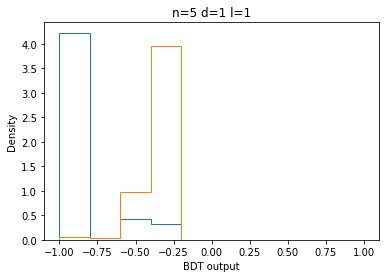

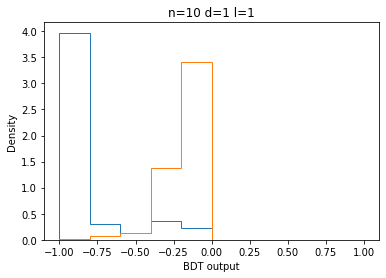

In [93]:
#n_testing = [100, 300, 600, 900, 1200]
#d_testing = [1, 2, 3, 4, 5]
#l_testing = [1, 2, 3, 4, 5]

n_testing = [5, 10] #Just seeing if it works 
d_testing = 1
l_testing = 1

for i in n_testing:
    plt.figure()
    test_BDT(i, d_testing, l_testing)

### Significance:

In [91]:
n_sig = len(test_signal)
n_bkg = len(test_bkg)

significance = n_sig/np.sqrt(n_sig + n_bkg)